    K-NEAREST NEIGHBORS (KNN)

In [16]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

data=pd.read_csv("column_2C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [17]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [18]:
data.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


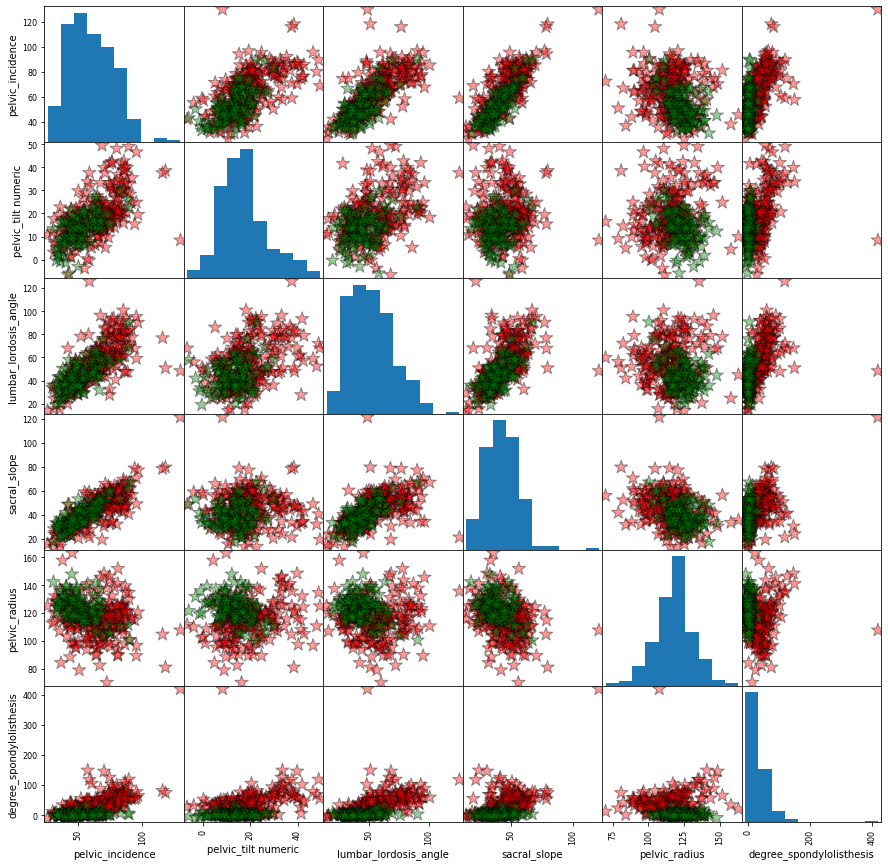

In [19]:
# Birçok özellik arasında güçlü korelizasyon olduğu gözükmekte 
# örneğin pelvic_incidence - sacral_slope ve lumbar_lordosis_angle - pelvic_incidence özelliklerinin arasında güçlü korelizasyon vardır

color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']] 
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.4,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

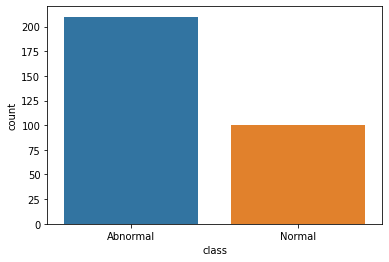

In [20]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

In [21]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# knn sınıflandırması için bir KNeighborsClassifier varlığı oluşturduk
knn = KNeighborsClassifier(n_neighbors = 3)

# verimizi özellikler ve label olarak ayırdık 
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y) #verileri instance yükledik 
prediction = knn.predict(x) # Modeli çalıştırıp sonuçları aldık 
print('Prediction: {}'.format(prediction))

# Fakat burda doğruluk oranını test etmek için eğitim de kullanılmayan bir veri seti olması daha doğru olur 

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [48]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


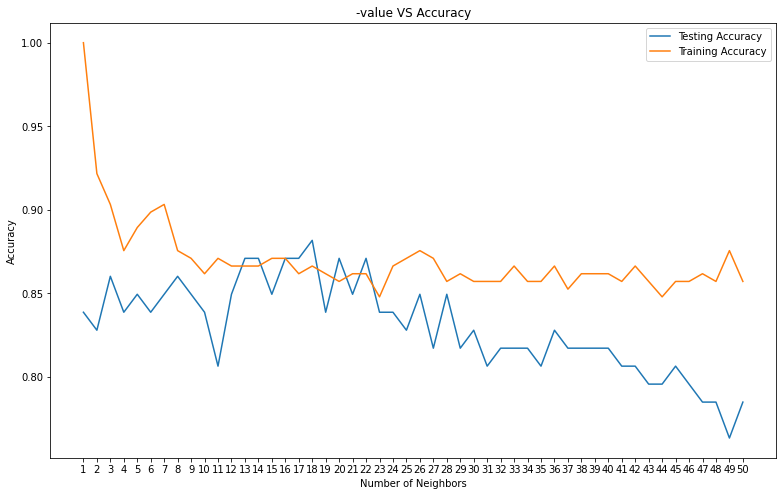

Best accuracy is 0.8817204301075269 with K = 18


In [68]:
# Model complexity
neig = np.arange(1, 51)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for k in range(1,51):
    
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


Average accuracy 0.8677572427572426


,Model,Best K,Best Accuracy
0,1.0,12.0,0.846154
1,2.0,1.0,0.884615
2,3.0,17.0,0.870130
3,4.0,16.0,0.870130


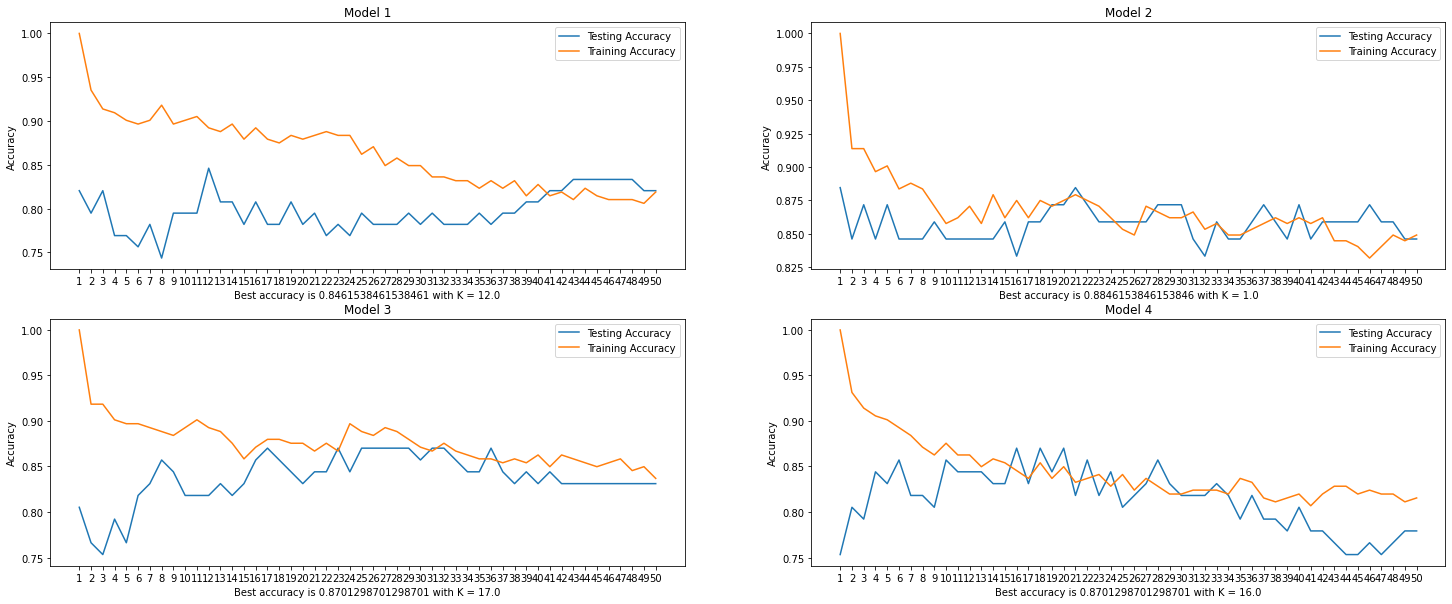

In [151]:
# verilerimizi bölerken random_state i değiştirdiğimizde accurays de değişiyor bunun önüne geçmek için cross_validation kullanılabilir 

from sklearn.model_selection import KFold

kfold=KFold(n_splits=4,shuffle=True,random_state=42)
i=0
rang=np.arange(1,51)

f1,axs=plt.subplots(2,2,figsize=(25,10))
plt_index=np.array([[0,0],[0,1],[1,0],[1,1]])

FoldNum_K_accuracy=np.zeros((4,3))

for train,test in kfold.split(x):
    
    x_train,x_test=x.loc[train],x.loc[test]
    y_train,y_test=y.loc[train],y.loc[test]

    train_accuracy.clear()
    test_accuracy.clear()
    
    for k in range(1,51):
        
        # k from 1 to 25(exclude)
        knn = KNeighborsClassifier(n_neighbors=k)
        # Fit with knn
        knn.fit(x_train,y_train)
        #train accuracy
        train_accuracy.append(knn.score(x_train, y_train))
        # test accuracy
        test_accuracy.append(knn.score(x_test, y_test))
    
    plt.figure(f1)

    plt_x=plt_index[i][0]
    plt_y=plt_index[i][1]

    axs[plt_x,plt_y].plot(rang, test_accuracy, label = 'Testing Accuracy')
    axs[plt_x,plt_y].plot(rang, train_accuracy, label = 'Training Accuracy')
    axs[plt_x,plt_y].legend()
    model_name=f"Model {i+1}"
    axs[plt_x,plt_y].set_title(model_name)

    FoldNum_K_accuracy[i]=[i+1, 1+test_accuracy.index(np.max(test_accuracy)) ,np.max(test_accuracy)]
    axs[plt_x,plt_y].set_xlabel("Best accuracy is {} with K = {}".format(FoldNum_K_accuracy[i,2],FoldNum_K_accuracy[i,1]))
    

    axs[plt_x,plt_y].set_ylabel('Accuracy')
    axs[plt_x,plt_y].set_xticks(rang)
    i=i+1

# kfold cross validation ile 4 farklı train ve test  set ikilisi oluşturduk 
# her bir veri seti için en iyi k değerini ve karşılık gelen accuracy i bulduk 
# Cross validation uygulayarek elde edeceğimiz ortalama accuracy değeri daha doğru bir accuracy değeri olacaktır
kfold_df=pd.DataFrame(data=FoldNum_K_accuracy,columns=["Model","Best K","Best Accuracy"])
print("Average accuracy",FoldNum_K_accuracy[:,2].mean())
kfold_df
